# 简单RNN的NumPy实现

In [2]:
import numpy as np

In [4]:
timesteps = 100  # 输入序列的时间步数
input_features = 32  # 输入特征空间的维度
output_features = 64  # 输出特征空间的维度

In [5]:
# 输入数据：随机噪声，仅作为示例

In [7]:
inputs = np.random.random((timesteps, input_features))

In [9]:
# 初始状态：全零向量

In [10]:
state_t = np.zeros((output_features,))

In [11]:
# 创建随机的权重矩阵

In [12]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

In [13]:
successive_outputs = []
for input_t in inputs:
    # 由输入和当前状态（前一个输出）计算得到当前输出
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # 将这个输出保存到列表中
    successive_outputs.append(output_t)
    # 更新网络的状态用于下一个时间步
    state_t = output_t
# 最终输出的是一个形状为(timesteps, output_features)
final_output_sequence = np.stack(successive_outputs, axis=0)

# Keras中的循环层

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [30]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 返回完整的状态序列

In [32]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 将多个循环层逐个堆叠可以提高网络的表达能力，在这种情况下，需要让所有中间层都返回完整的输出序列

In [35]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# 将此模型应用于IMDB电影评论

## 准备IMDB数据

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [8]:
max_features = 10000  # 作为特征的单词个数
maxlen = 500  # 在maxlen单词后截断文本
batch_size = 32

In [9]:
print('Loading data ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data ...
25000 train sequences
25000 test sequences


In [10]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(sequences=input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(sequences=input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## 用Embedding层和SimpleRNN层来训练模型

In [41]:
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [45]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s - loss: 0.6461 - acc: 0.6154 - val_loss: 0.5383 - val_acc: 0.7776
Epoch 2/10
20000/20000 [==============================] - 33s - loss: 0.4098 - acc: 0.8266 - val_loss: 0.4057 - val_acc: 0.8268.82
Epoch 3/10
20000/20000 [==============================] - 28s - loss: 0.2797 - acc: 0.8886 - val_loss: 0.3838 - val_acc: 0.8308
Epoch 4/10
20000/20000 [==============================] - 28s - loss: 0.1991 - acc: 0.9265 - val_loss: 0.4465 - val_acc: 0.8084
Epoch 5/10
20000/20000 [==============================] - 28s - loss: 0.1372 - acc: 0.9510 - val_loss: 0.5261 - val_acc: 0.8330
Epoch 6/10
20000/20000 [==============================] - 34s - loss: 0.0944 - acc: 0.9683 - val_loss: 0.6771 - val_acc: 0.7296
Epoch 7/10
20000/20000 [==============================] - 28s - loss: 0.0588 - acc: 0.9827 - val_loss: 0.5541 - val_acc: 0.8146
Epoch 8/10
20000/20000 [============================

## 绘制结果

In [46]:
import matplotlib.pyplot as plt

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
epochs = range(1, len(acc) + 1)

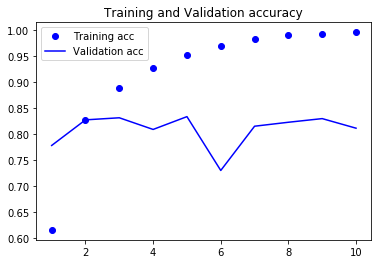

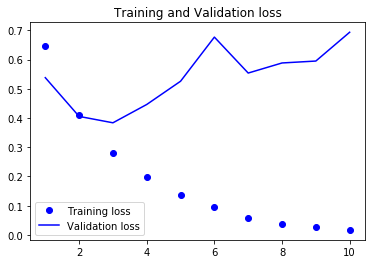

In [49]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Keras中一个LSTM的例子

## 使用Keras中的LSTM

In [11]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(LSTM(units=32))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [15]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 133s - loss: 0.5607 - acc: 0.7319 - val_loss: 0.4000 - val_acc: 0.8368
Epoch 2/10
20000/20000 [==============================] - 136s - loss: 0.3155 - acc: 0.8774 - val_loss: 0.5424 - val_acc: 0.8168
Epoch 3/10
20000/20000 [==============================] - 136s - loss: 0.2466 - acc: 0.9049 - val_loss: 0.3286 - val_acc: 0.8636
Epoch 4/10
20000/20000 [==============================] - 145s - loss: 0.2115 - acc: 0.9239 - val_loss: 0.2960 - val_acc: 0.8836
Epoch 5/10
20000/20000 [==============================] - 132s - loss: 0.1802 - acc: 0.9355 - val_loss: 0.2902 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 121s - loss: 0.1580 - acc: 0.9441 - val_loss: 0.3381 - val_acc: 0.8660
Epoch 7/10
20000/20000 [==============================] - 122s - loss: 0.1454 - acc: 0.9502 - val_loss: 0.3341 - val_acc: 0.8856
Epoch 8/10
20000/20000 [========================

## 绘制结果

In [16]:
from matplotlib import pyplot as plt

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
epochs = range(1, len(acc) + 1)

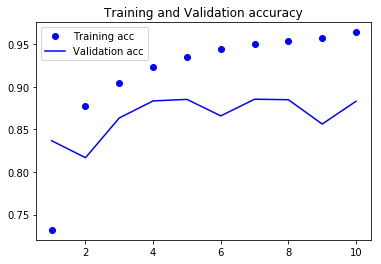

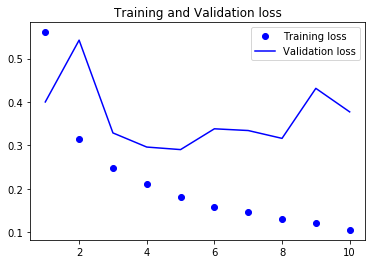

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()